# 1: Loading Data

In [6]:
#importing required packages for this module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Loading the data
data0 = pd.read_csv("datasets/adjusted/PhiUSIIL_Phishing_URL_Dataset_clean.csv", on_bad_lines='skip')
data0.head()

,URL,URLLength,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,LetterRatioInURL,DegitRatioInURL,NoOfEqualsInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.uni-mainz.de,23,16,0,2,1,0,0.391,0.0,0,...,0,0,1,50,9,8,39,0,217,1
1,https://www.voicefmradio.co.uk,29,22,0,2,2,0,0.517,0.0,0,...,0,0,1,10,2,7,42,2,5,1
2,https://www.sfnmjournal.com,26,19,0,3,1,0,0.500,0.0,0,...,1,1,1,3,27,15,22,1,31,1
3,https://www.rewildingargentina.org,33,26,0,3,1,0,0.606,0.0,0,...,1,0,1,244,15,34,72,1,85,1
4,https://www.globalreporting.org,30,23,0,3,1,0,0.567,0.0,0,...,0,0,1,35,1,11,86,0,14,1


# 2: Familiarizing with Data

In [9]:
#checking the shape of the dataset
data0.shape

(234570, 38)

In [10]:
#Listing the features of the dataset
data0.columns

Index(['URL', 'URLLength', 'DomainLength', 'IsDomainIP', 'TLDLength',
       'NoOfSubDomain', 'NoOfObfuscatedChar', 'LetterRatioInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'HasFavicon', 'Robots', 'HasDescription', 'NoOfPopup',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef', 'label'],
      dtype='object')

# 3. Visualizing the data

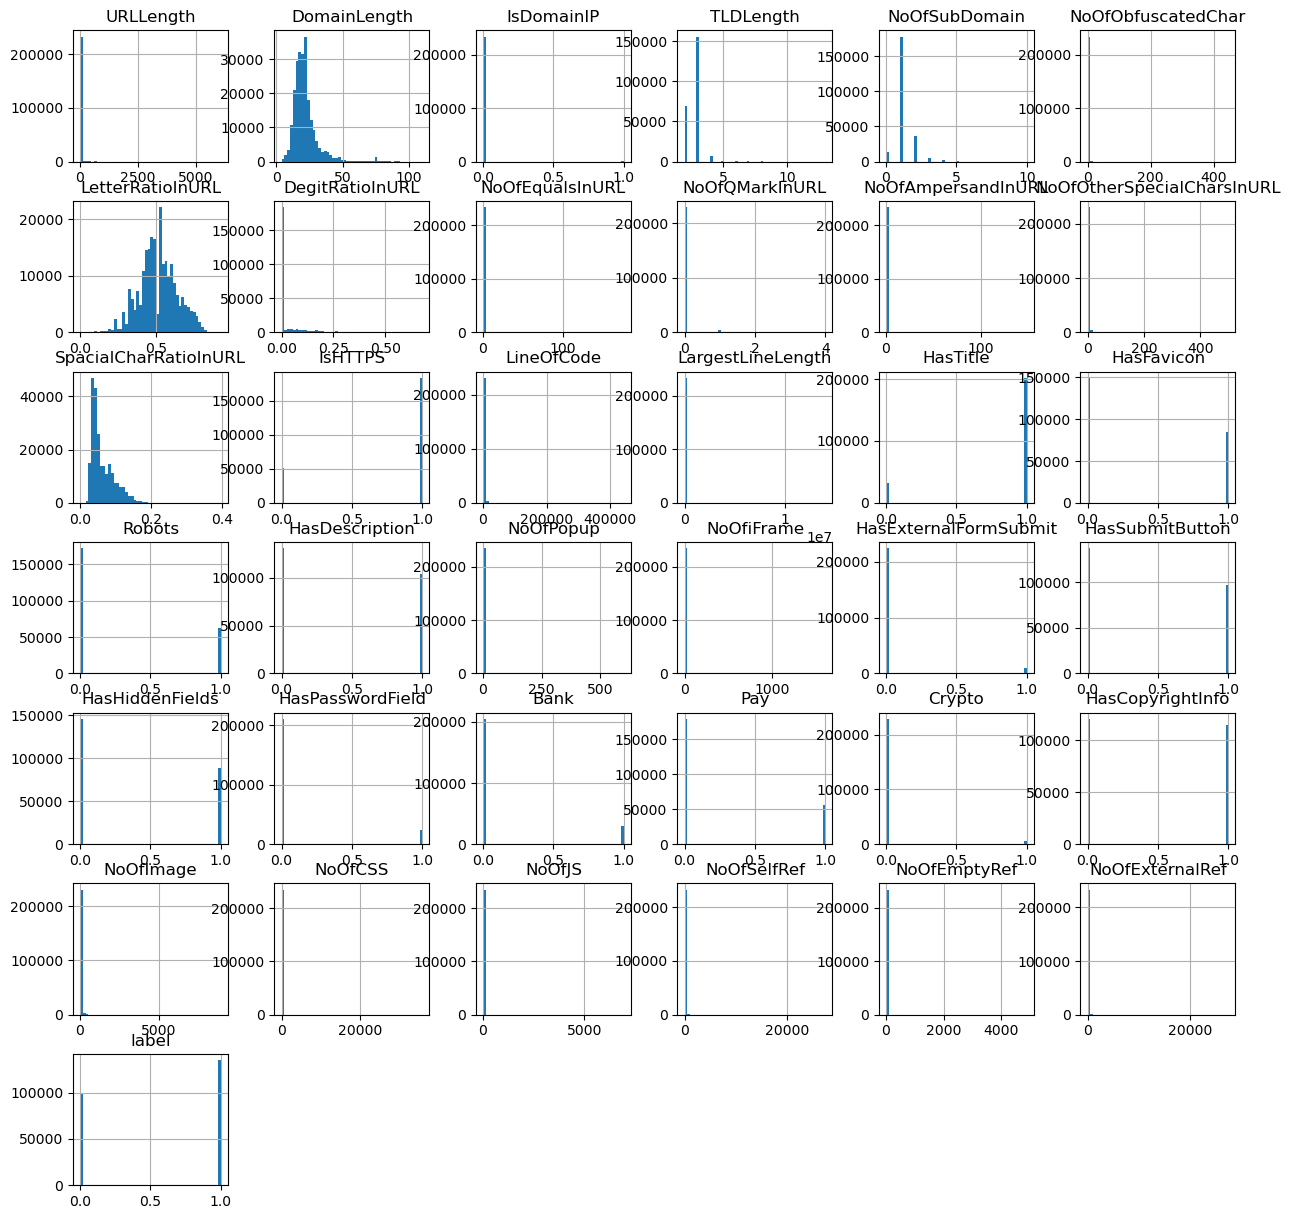

In [11]:
#Plotting the data distribution
data0.hist(bins = 50, figsize = (15,15))
plt.show()

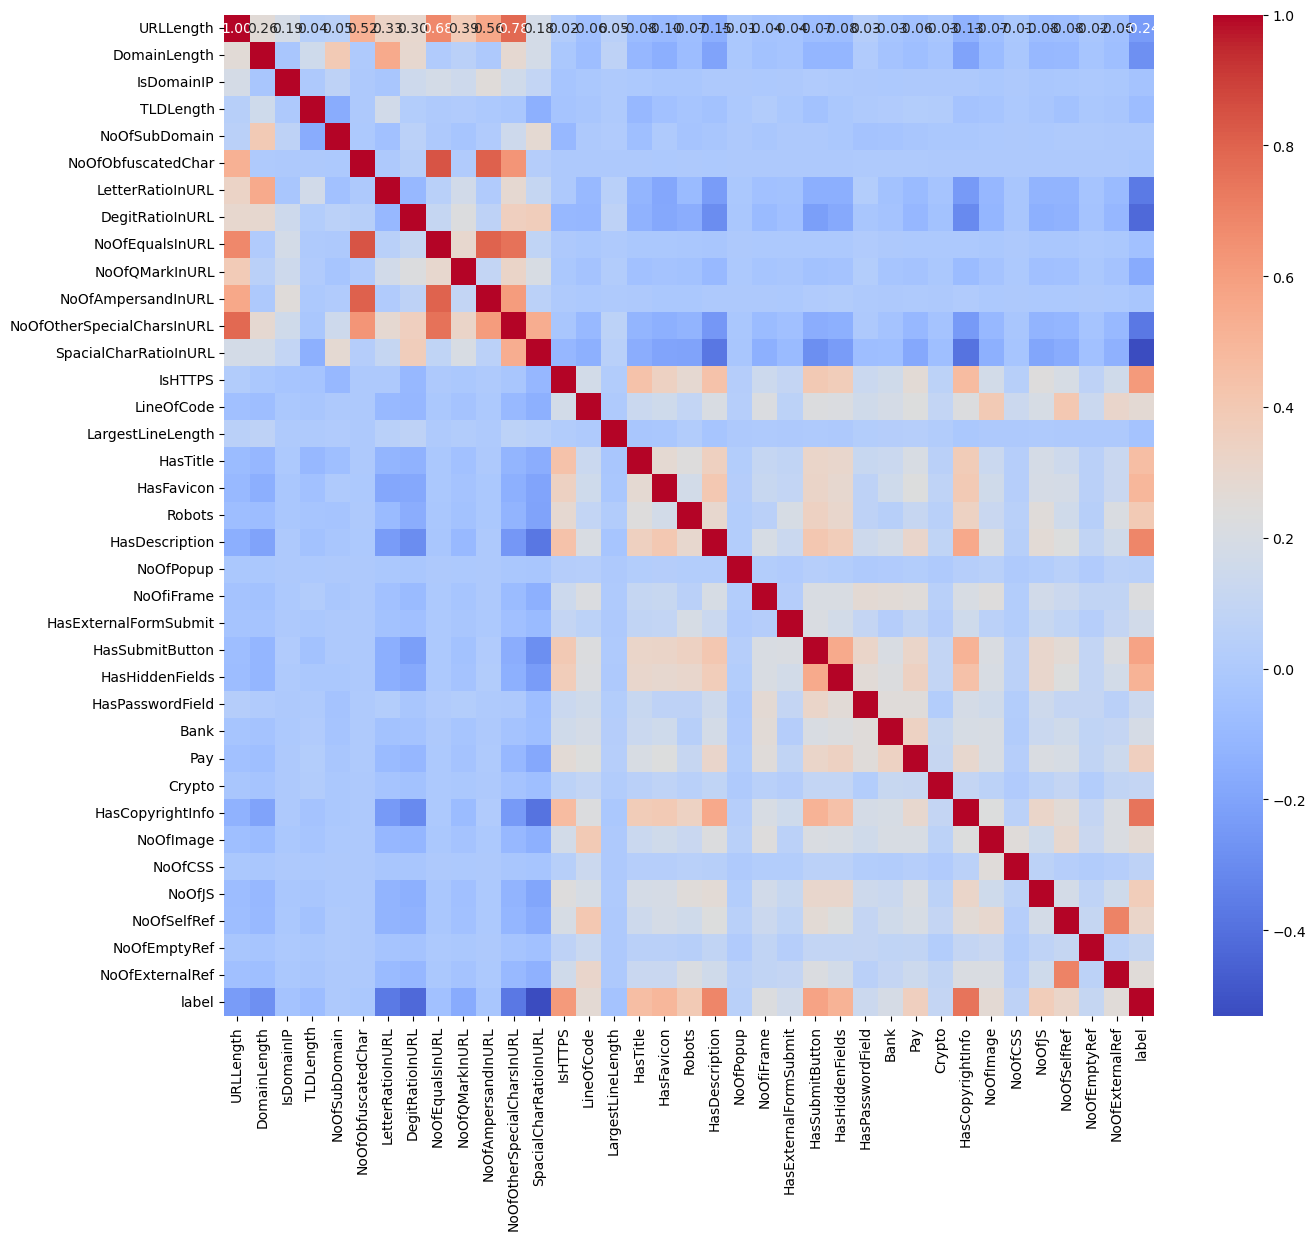

In [12]:
#Adjusting the dataset, so it only contains numerical columns
data_numeric = data0.select_dtypes(include=['number'])

#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# 5. Data Preprocessing & EDA
In this step it is crucial to apply data preprocessing techniques and transform the data to use it in the models

In [24]:
data0.describe()

,URLLength,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,LetterRatioInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,...,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000,234570.000000
mean,33.573326,21.428601,0.001539,2.764335,1.161952,0.018724,0.515283,0.027902,0.040448,0.021887,...,0.237805,0.023567,0.487650,26.196649,6.360920,10.571070,65.408053,2.386631,49.511672,0.574877
std,35.989343,9.066076,0.039200,0.599856,0.593139,1.853372,0.123142,0.070082,0.843970,0.151946,...,0.425740,0.151695,0.499849,79.600425,75.060431,22.358381,177.086376,17.683998,161.409700,0.494363
min,13.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,2.000000,1.000000,0.000000,0.435000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,3.000000,1.000000,0.000000,0.519000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,2.000000,6.000000,13.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.594000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,30.000000,8.000000,15.000000,88.000000,1.000000,58.000000,1.000000
max,6097.000000,110.000000,1.000000,13.000000,10.000000,447.000000,0.926000,0.678000,176.000000,4.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [27]:
#checking the data for null or missing values
data0.isnull().sum()
data = data0.drop(['URL'], axis = 1).copy()

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.
To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [29]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,URLLength,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,LetterRatioInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,30,23,0,3,1,0,0.533,0.000,0,0,...,0,0,1,7,1,2,48,0,16,1
1,136,11,0,3,0,0,0.544,0.235,0,0,...,0,0,0,0,4,63,67,0,1,0
2,24,17,0,3,1,0,0.417,0.000,0,0,...,0,0,0,9,38,46,59,7,65,1
3,24,17,0,2,1,0,0.458,0.000,0,0,...,0,0,0,348,2,12,222,0,218,1
4,56,47,0,2,2,0,0.393,0.321,0,0,...,0,0,0,0,0,0,0,0,2,0


From the above execution, it is clear that the data doesnot have any missing values.
By this, the data is throughly preprocessed & is ready for training.

# 6. Splitting the Data

In [32]:
# Sepratating & assigning features and target columns to X & y
y = data['label']
X = data.drop('label',axis=1)
X.shape, y.shape

((234570, 36), (234570,))

In [33]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((187656, 36), (46914, 36))

# 7. Machine Learning Models & Training

From the dataset above, it is clear that this is a supervised machine learning task. We'll be using the classification problem, as the general problem for this dataset is to decide whether a url is a legit or phishing one. The supervised machine learning models (classification) considered to train the dataset in this notebook are as followed:
* Decision Tree
* Multi-layer Perceptron (Neural Network)
* SVM

In [92]:
#importing packages
from sklearn.metrics import accuracy_score
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [36]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 10)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [69]:
#predicting the target value from the model for the samples
y_predict = tree.predict(X_test)
y_predict_train = tree.predict(X_train)

### Performance Evaluation:

In [70]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train, y_predict_train)
acc_test_tree = accuracy_score(y_test,y_predict)

print("Decision Tree: Accuracy on test Data: {:.10f}".format(acc_test_tree))

Decision Tree: Accuracy on test Data: 0.9985718549


In [93]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### Confusion Matrix

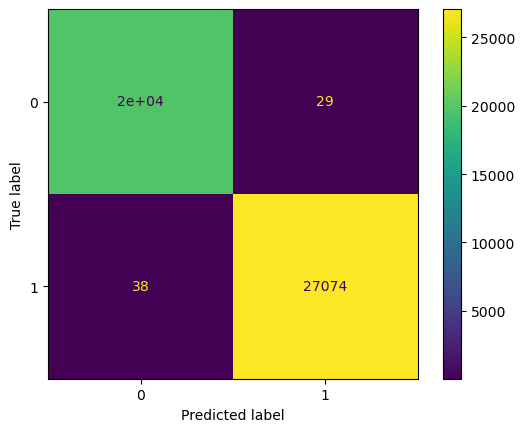

In [43]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

### 7.2 Multilayer Perceptrons (MLPs): Deep Learning

In [44]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

Comment: Time of building MLPClassifier was about 2 minutes*

In [72]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [78]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.10f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.10f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.9993658609
Multilayer Perceptrons: Accuracy on test Data: 0.9993605320


In [94]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### 7.3 SVM (Support Vector Machine)

In [49]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [61]:
#Getting the separating hyperplane
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (svm.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = svm.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svm.support_vectors_[-1]
yy_up = a * xx + (b[1] - a*b[0])

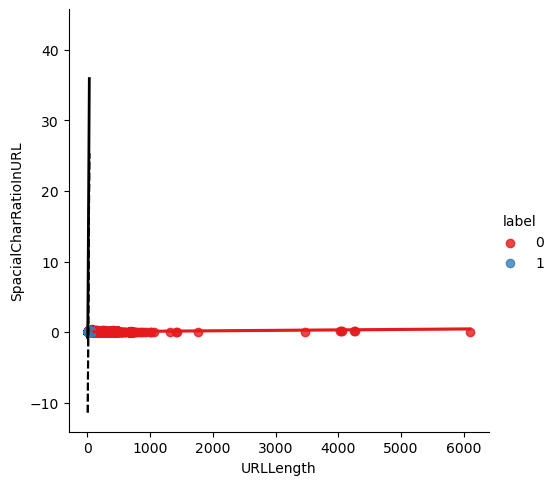

In [62]:
urls = data
# Visualizing the margins and support vectors
sns.lmplot(x='URLLength', y='SpacialCharRatioInURL', data=data, hue='label', palette='Set1')
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=80, facecolors='none')

In [74]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [75]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.10f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.10f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.9981135695
SVM : Accuracy on test Data: 0.9984439613


In [95]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [96]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.999,0.999
1,Multilayer Perceptrons,0.999,0.999
2,SVM,0.998,0.998


In [90]:
ML_Model.clear()
acc_train.clear()
acc_test.clear()